# Mínimos cuadrados
## Prueba 02
Interpole los siguientes conjuntos de datos con la función correspondiente. 

In [1]:
%load_ext autoreload

La ecuación de la línea es:

$ y(x) = a_1 x + a_0 $

Al realizar el proceso de mínimos cuadrados queda el siguiente sistema de ecuaciones:


$( \sum_i (y_i - a_1 x_i - a_0) , \sum_i (y_i - a_1 x_i - a_0)x_i ) = 0$

In [28]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 1 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """

    # coeficiente del término independiente
    c_ind = sum(ys)

    # coeficiente del parámetro 1
    c_1 = sum(xs)

    # coeficiente del parámetro 0
    c_0 = len(xs)

    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list) -> tuple[float, float, float]:
    """Retorna los coeficientes de la ecuación de la derivada parcial con respecto al parámetro 0 al reemplazar los valores ``xs`` y ``ys``. La ecuación es de la forma:
    c_1 * a_1 + c_0 * a_0 = c_ind


    ## Parameters

    ``xs``: lista de valores de x.

    ``ys``: lista de valores de y.

    ## Return

    ``c_1``: coeficiente del parámetro 1.

    ``c_0``: coeficiente del parámetro 0.

    ``c_ind``: coeficiente del término independiente.

    """
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        # coeficiente del término independiente
        c_ind += xi * yi

        # coeficiente del parámetro 1
        c_1 += xi * xi

        # coeficiente del parámetro 0
        c_0 += xi

    return (c_1, c_0, c_ind)

In [3]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    -12.7292,
    -7.5775,
    -7.7390,
    -4.1646,
    -4.5382,
    2.2048,
    4.3369,
    2.2227,
    9.0625,
    7.1860,
]

In [4]:
from src import ajustar_min_cuadrados  # no modificar esta función

pars = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

[01-23 21:47:04][INFO] 2025-01-23 21:47:04.641260
[01-23 21:47:04][INFO] 2025-01-23 21:47:04.760777
[01-23 21:47:04][INFO] Se ajustarán 2 parámetros.
[01-23 21:47:04][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


[01-23 21:47:05][INFO] Se ajustarán 2 parámetros.
[01-23 21:47:05][INFO] 
[[101.8525926    0.         209.87476711]
 [  0.          10.         -11.7356    ]]


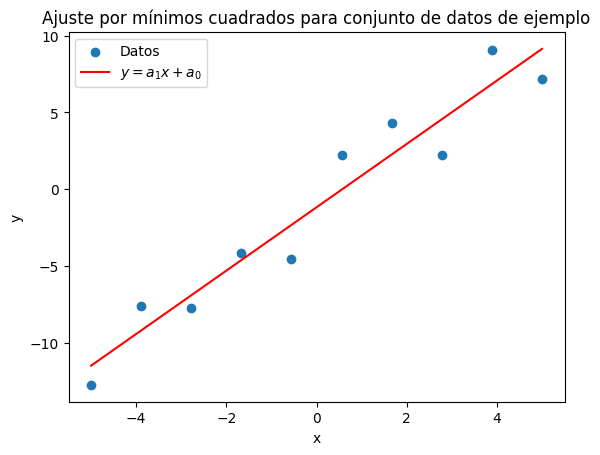

In [5]:
import numpy as np
import matplotlib.pyplot as plt

m, b = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_0, der_parcial_1])

x = np.linspace(-5, 5, 100)

y = [m * xi + b for xi in x]

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()

## Conjunto de datos 1

In [6]:
xs1 = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys1 = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

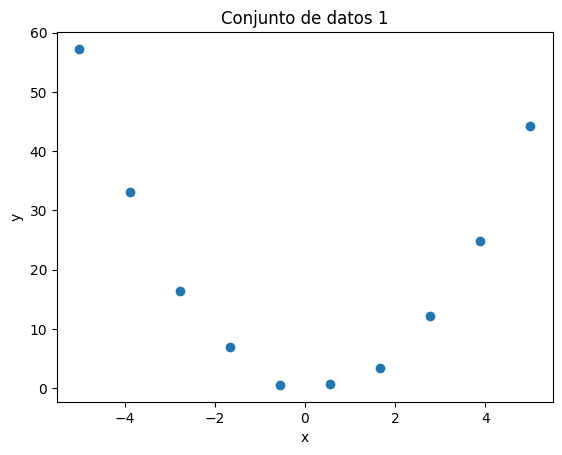

In [7]:
plt.scatter(xs1, ys1)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 1")
plt.show()

x = -0.948805441087225
x = 1.50369543945971


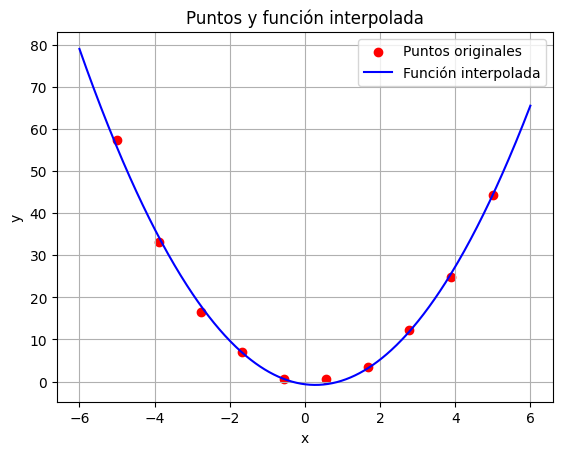

In [44]:
from sympy import symbols, Eq, solve, lambdify
import numpy as np
import matplotlib.pyplot as plt


def coef_parcial_2(lista_x: list, lista_y: list) -> tuple[float, float, float, float]:
    coef_cuadrado = sum(x ** 2 for x in lista_x)
    coef_lineal = sum(lista_x)
    coef_constante = len(lista_x)
    termino_independiente = sum(lista_y)

    return coef_cuadrado, coef_lineal, coef_constante, termino_independiente


def coef_parcial_1(lista_x: list, lista_y: list) -> tuple[float, float, float, float]:
    coef_cuadrado = sum(x ** 3 for x in lista_x)
    coef_lineal = sum(x ** 2 for x in lista_x)
    coef_constante = sum(lista_x)
    termino_independiente = sum(x * y for x, y in zip(lista_x, lista_y))

    return coef_cuadrado, coef_lineal, coef_constante, termino_independiente


def coef_parcial_0(lista_x: list, lista_y: list) -> tuple[float, float, float, float]:
    coef_cuadrado = sum(x ** 4 for x in lista_x)
    coef_lineal = sum(x ** 3 for x in lista_x)
    coef_constante = sum(x ** 2 for x in lista_x)
    termino_independiente = sum((x ** 2) * y for x, y in zip(lista_x, lista_y))

    return coef_cuadrado, coef_lineal, coef_constante, termino_independiente


# Implementar la función ajustar_minimos_cuadrados
def ajustar_minimos_cuadrados(xs, ys, gradiente):
    # Resolviendo el sistema de ecuaciones lineales
    coeficientes = [func(xs, ys) for func in gradiente]
    matriz = [c[:3] for c in coeficientes]
    vector_ind = [c[3] for c in coeficientes]

    from numpy.linalg import solve
    parametros = solve(matriz, vector_ind)
    return parametros

# Calcular parámetros
parametros = ajustar_minimos_cuadrados(
    xs1,
    ys1,
    gradiente=[coef_parcial_0, coef_parcial_1, coef_parcial_2],
)

# Resolver la ecuación para un valor dado
variable_x = symbols('x')
ecuacion = Eq(parametros[0] * variable_x ** 2 + parametros[1] * variable_x + parametros[2], 2.25)
soluciones = solve(ecuacion, variable_x)

# Imprimir las soluciones
for solucion in soluciones:
    print(f"x = {solucion.evalf()}")

# Visualizar los puntos y la función interpolada
func_interpolada = lambdify(variable_x, parametros[0] * variable_x ** 2 + parametros[1] * variable_x + parametros[2])
x_rango = np.linspace(min(xs1) - 1, max(xs1) + 1, 500)
y_rango = func_interpolada(x_rango)

plt.scatter(xs1, ys1, color='red', label="Puntos originales")
plt.plot(x_rango, y_rango, label="Función interpolada", color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Puntos y función interpolada")
plt.legend()
plt.grid(True)
plt.show()


Interpole el conjunto de datos 1 usando la función cuadrática. 

## Conjunto de datos 2

In [9]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

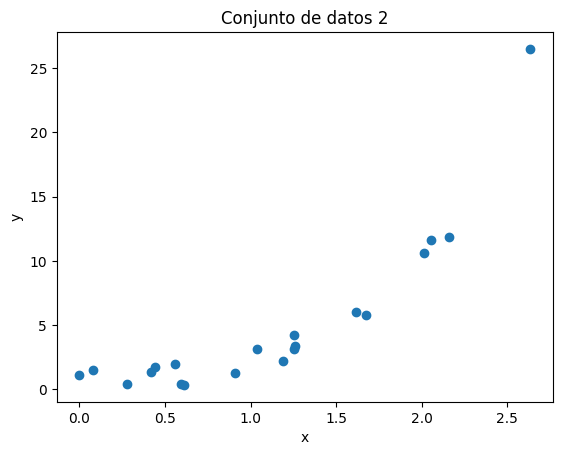

In [10]:
plt.scatter(xs2, ys2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Conjunto de datos 2")
plt.show()

Interpole el conjunto de datos 2 usando la función exponencial. 

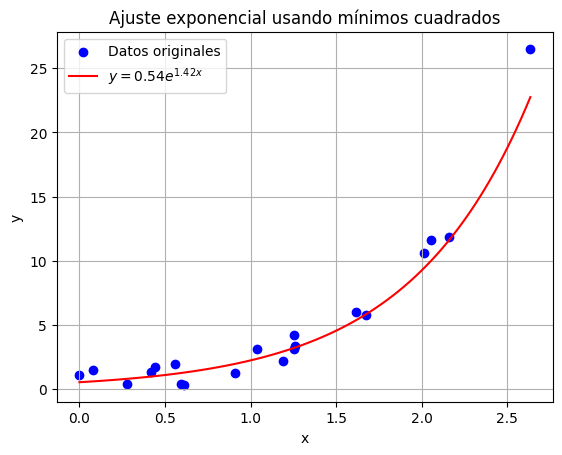

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def der_parcial_ln_1(xs: list, ys_ln: list) -> tuple[float, float, float]:
    """
    Derivada parcial de la suma de errores con respecto al parámetro a (pendiente).
    Basado en el modelo transformado: Y = B + a * x.

    ## Parameters

    ``xs``: lista de valores de x.

    ``ys_ln``: lista de valores ln(y).

    ## Return

    ``c_1``: coeficiente del parámetro a.

    ``c_0``: coeficiente del parámetro B.

    ``c_ind``: término independiente.
    """
    # Coeficientes
    c_1 = sum(x ** 2 for x in xs)  # Coeficiente asociado a a
    c_0 = sum(xs)                  # Coeficiente asociado a B
    c_ind = sum(x * y_ln for x, y_ln in zip(xs, ys_ln))  # Término independiente

    return (c_1, c_0, c_ind)


def der_parcial_ln_0(xs: list, ys_ln: list) -> tuple[float, float, float]:
    """
    Derivada parcial de la suma de errores con respecto al parámetro B (intercepto).
    Basado en el modelo transformado: Y = B + a * x.

    ## Parameters

    ``xs``: lista de valores de x.

    ``ys_ln``: lista de valores ln(y).

    ## Return

    ``c_1``: coeficiente del parámetro a.

    ``c_0``: coeficiente del parámetro B.

    ``c_ind``: término independiente.
    """
    # Coeficientes
    c_1 = sum(xs)                  # Coeficiente asociado a a
    c_0 = len(xs)                  # Coeficiente asociado a B
    c_ind = sum(ys_ln)             # Término independiente

    return (c_1, c_0, c_ind)

# Transformar los valores de y mediante ln
ys_ln = np.log(ys2)

# Ajustar los parámetros utilizando las derivadas parciales
a, ln_A = ajustar_min_cuadrados(xs2, ys_ln, gradiente=[der_parcial_ln_1, der_parcial_ln_0])

# Convertir ln(A) a A
A = np.exp(ln_A)

# Generar datos para la curva ajustada
x = np.linspace(min(xs2), max(xs2), 100)
y = [A * np.exp(a * xi) for xi in x]

# Graficar los datos originales y la curva ajustada
plt.scatter(xs2, ys2, label="Datos originales", color="blue")
plt.plot(x, y, color="red", label=f"$y = {A:.2f}e^{{{a:.2f}x}}$")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste exponencial usando mínimos cuadrados")
plt.legend()
plt.grid(True)
plt.show()